# Problem Set 1 - Neural network implementation

Team PS 1 G

Team members:
- Xiaohan Wu - 237867
- Farhan Yusuf Shaikh - 249899
- Fanus Ghorjani - 248835

We used GPT-5 in our coding process to review the code, ask for debug sugesstions, and sometimes learn more about how neural networks work, so we could understand the connection between theory and code.

As described in section "3 Neural network implementation" of assignment 1, the goal is to build a shallow neural network from scratch using different approaches. To validate that your code is working and that the network is actually learning something, please use the following MNIST classification task. Finally, please submit proof of the learning progress as described in the assignment.

## Imports

In [39]:
import random
import pandas as pd
import numpy as np
from sklearn import model_selection
import sklearn.datasets as sk_datasets
import torchvision.datasets as torch_datasets
from torchvision import transforms
import torch
import matplotlib.pyplot as plt

from scratch.network import Network
from scratch.res_network import ResNetwork
from pytorch.network import TorchNetwork
from scratch.utils import *
from itertools import product

In [2]:
# Automatically load changes in imported modules
%load_ext autoreload
%autoreload 2

# Explicitly set seed for reproducibility
GLOBAL_RANDOM_STATE = 42

random.seed(GLOBAL_RANDOM_STATE)
np.random.seed(GLOBAL_RANDOM_STATE)

## A) Neural Network Classifier from Scratch

### Data

In [3]:
# Download MNIST dataset
x, y_cat = sk_datasets.fetch_openml('mnist_784', version=1, return_X_y=True, cache=True, as_frame=False)

# Preprocess dataset
x = (x / 255).astype('float32')
y_cat = y_cat.astype(int)
# One-hot encode y
y = np.zeros((len(y_cat), 10))
for i, val in enumerate(y_cat):
    y[i, val] = 1

# Use only small subset of data for faster training
x = x[:1000]
y = y[:1000]

# Split data into train and validation set
x_train, x_val, y_train, y_val = model_selection.train_test_split(x, y, test_size=0.2, random_state=GLOBAL_RANDOM_STATE)

### ML Model & Training

In [4]:
fnn = Network(sizes=[784, 128, 64, 10], learning_rate=0.1, epochs=50)
fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=False)

Epoch: 1, Training Time: 0.02s, Training Accuracy: 15.75%, Validation Accuracy: 12.00%
Epoch: 2, Training Time: 0.03s, Training Accuracy: 15.88%, Validation Accuracy: 17.50%
Epoch: 3, Training Time: 0.04s, Training Accuracy: 18.12%, Validation Accuracy: 21.50%
Epoch: 4, Training Time: 0.05s, Training Accuracy: 22.75%, Validation Accuracy: 23.00%
Epoch: 5, Training Time: 0.06s, Training Accuracy: 25.62%, Validation Accuracy: 26.00%
Epoch: 6, Training Time: 0.08s, Training Accuracy: 28.38%, Validation Accuracy: 29.00%
Epoch: 7, Training Time: 0.09s, Training Accuracy: 30.12%, Validation Accuracy: 31.00%
Epoch: 8, Training Time: 0.10s, Training Accuracy: 32.88%, Validation Accuracy: 33.50%
Epoch: 9, Training Time: 0.11s, Training Accuracy: 33.50%, Validation Accuracy: 33.50%
Epoch: 10, Training Time: 0.13s, Training Accuracy: 34.88%, Validation Accuracy: 36.00%
Epoch: 11, Training Time: 0.14s, Training Accuracy: 36.38%, Validation Accuracy: 37.00%
Epoch: 12, Training Time: 0.15s, Training

### Test cosine annealing scheduler

In [5]:
fnn.fit(x_train, y_train, x_val, y_val, cosine_annealing_lr=True)

Epoch: 1, Training Time: 0.01s, Training Accuracy: 75.38%, Validation Accuracy: 70.00%
Epoch: 2, Training Time: 0.03s, Training Accuracy: 75.88%, Validation Accuracy: 72.00%
Epoch: 3, Training Time: 0.04s, Training Accuracy: 76.50%, Validation Accuracy: 71.00%
Epoch: 4, Training Time: 0.05s, Training Accuracy: 77.25%, Validation Accuracy: 72.00%
Epoch: 5, Training Time: 0.06s, Training Accuracy: 77.62%, Validation Accuracy: 72.50%
Epoch: 6, Training Time: 0.08s, Training Accuracy: 77.75%, Validation Accuracy: 72.50%
Epoch: 7, Training Time: 0.09s, Training Accuracy: 78.62%, Validation Accuracy: 73.50%
Epoch: 8, Training Time: 0.11s, Training Accuracy: 79.00%, Validation Accuracy: 74.50%
Epoch: 9, Training Time: 0.12s, Training Accuracy: 79.12%, Validation Accuracy: 74.50%
Epoch: 10, Training Time: 0.13s, Training Accuracy: 80.00%, Validation Accuracy: 75.00%
Epoch: 11, Training Time: 0.15s, Training Accuracy: 80.38%, Validation Accuracy: 76.00%
Epoch: 12, Training Time: 0.16s, Training

### Test residual neural network

In [20]:
res_nn = ResNetwork(sizes=[784, 128, 128, 10], learning_rate=0.005, epochs=50)
res_nn.fit(x_train, y_train, x_val, y_val)

Epoch: 1, Training Time: 0.02s, Training Accuracy: 11.25%, Validation Accuracy: 12.50%
Epoch: 2, Training Time: 0.04s, Training Accuracy: 11.25%, Validation Accuracy: 12.00%
Epoch: 3, Training Time: 0.05s, Training Accuracy: 12.62%, Validation Accuracy: 10.50%
Epoch: 4, Training Time: 0.06s, Training Accuracy: 13.75%, Validation Accuracy: 12.50%
Epoch: 5, Training Time: 0.07s, Training Accuracy: 15.75%, Validation Accuracy: 12.00%
Epoch: 6, Training Time: 0.09s, Training Accuracy: 17.50%, Validation Accuracy: 13.50%
Epoch: 7, Training Time: 0.10s, Training Accuracy: 18.75%, Validation Accuracy: 16.50%
Epoch: 8, Training Time: 0.12s, Training Accuracy: 21.12%, Validation Accuracy: 19.50%
Epoch: 9, Training Time: 0.13s, Training Accuracy: 23.88%, Validation Accuracy: 20.50%
Epoch: 10, Training Time: 0.15s, Training Accuracy: 28.00%, Validation Accuracy: 24.00%
Epoch: 11, Training Time: 0.16s, Training Accuracy: 29.62%, Validation Accuracy: 25.00%
Epoch: 12, Training Time: 0.17s, Training

## B) Neural Network Classifier using Torch

### Data

In [21]:
# Define data preprocessing steps
transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.5,), (0.5,))
            ])

# Download MNIST dataset
train_set = torch_datasets.MNIST('data', train=True, download=True, transform=transform)
val_set = torch_datasets.MNIST('data', train=False, download=True, transform=transform)

# Use only small subset of data for faster training
train_set = torch.utils.data.Subset(train_set, range(1000))
val_set = torch.utils.data.Subset(val_set, range(1000))

# Utilize PyTorch DataLoader from simplified & harmonized loading of data
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=1)

### ML Model & Training

In [58]:
torch_nn = TorchNetwork(sizes=[784, 128, 64, 10], learning_rate=0.2, epochs=50, random_state=GLOBAL_RANDOM_STATE)
torch_nn.fit(train_loader, val_loader)

Epoch: 1, Training Time: 0.53s, Learning Rate: 0.2, Training Accuracy: 12.10%, Validation Accuracy: 10.20%
Epoch: 2, Training Time: 1.06s, Learning Rate: 0.2, Training Accuracy: 41.10%, Validation Accuracy: 38.40%
Epoch: 3, Training Time: 1.58s, Learning Rate: 0.2, Training Accuracy: 56.10%, Validation Accuracy: 52.90%
Epoch: 4, Training Time: 2.10s, Learning Rate: 0.2, Training Accuracy: 66.80%, Validation Accuracy: 61.30%
Epoch: 5, Training Time: 2.61s, Learning Rate: 0.2, Training Accuracy: 72.70%, Validation Accuracy: 66.70%
Epoch: 6, Training Time: 3.13s, Learning Rate: 0.2, Training Accuracy: 76.50%, Validation Accuracy: 68.30%
Epoch: 7, Training Time: 3.64s, Learning Rate: 0.2, Training Accuracy: 78.80%, Validation Accuracy: 69.80%
Epoch: 8, Training Time: 4.15s, Learning Rate: 0.2, Training Accuracy: 81.30%, Validation Accuracy: 70.20%
Epoch: 9, Training Time: 4.66s, Learning Rate: 0.2, Training Accuracy: 83.00%, Validation Accuracy: 72.10%
Epoch: 10, Training Time: 5.17s, Lear

## C) Visualize accuracy & hyperparameter tuning

Here, you should compare the accuracy of all trained models. Optionally, you can also show the results of hyperparameter tuning and comment which hyperparameters work best for this task.

In [59]:
# Final accuracies
scratch_acc = fnn.compute_accuracy(x_val, y_val)
res_acc = res_nn.compute_accuracy(x_val, y_val)
torch_acc = torch_nn.compute_accuracy(val_loader)

print(f"Final Validation Accuracy (Scratch FNN): {scratch_acc*100:.2f}%")
print(f"Final Validation Accuracy (Scratch Residual): {res_acc*100:.2f}%")
print(f"Final Validation Accuracy (PyTorch NN): {torch_acc*100:.2f}%")

Final Validation Accuracy (Scratch FNN): 78.00%
Final Validation Accuracy (Scratch Residual): 69.00%
Final Validation Accuracy (PyTorch NN): 85.40%


### Plot accuracy curves

In [60]:
def accuracy_plot(model, model_name):
    plt.figure(figsize=(8,6))

    # Training vs Validation accuracy
    epochs = range(1, len(model.train_accuracies)+1)
    plt.plot(epochs, model.train_accuracies, label="Training", color="royalblue", linewidth=2, marker="o", markersize=4)
    plt.plot(epochs, model.val_accuracies, label="Validation", color="tomato", linewidth=2, marker="s", markersize=4)

    # Professional styling
    plt.title(f"Test and Validation Accuracy: {model_name}", fontsize=14, fontweight="bold")
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(0, 1.05)  # accuracy is always in [0,1]
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.legend(frameon=False, fontsize=11, loc="lower right")

    plt.tight_layout()
    plt.show()

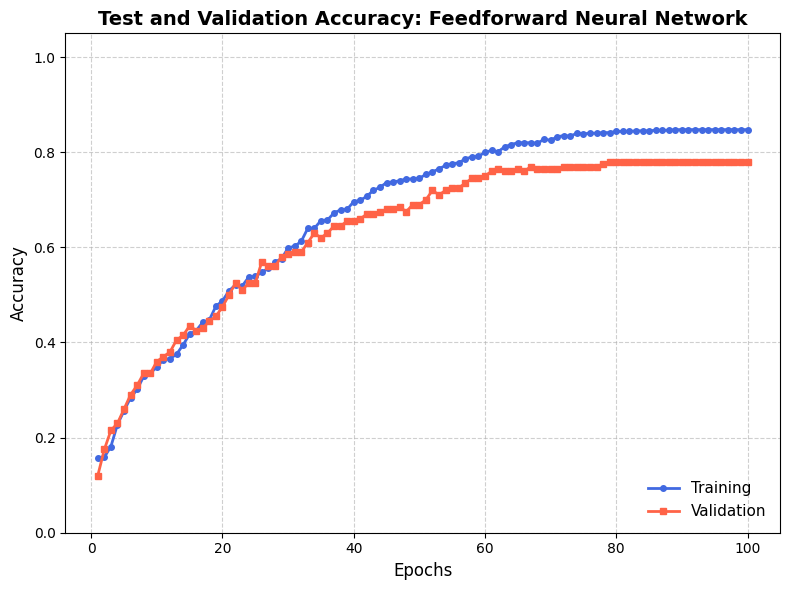

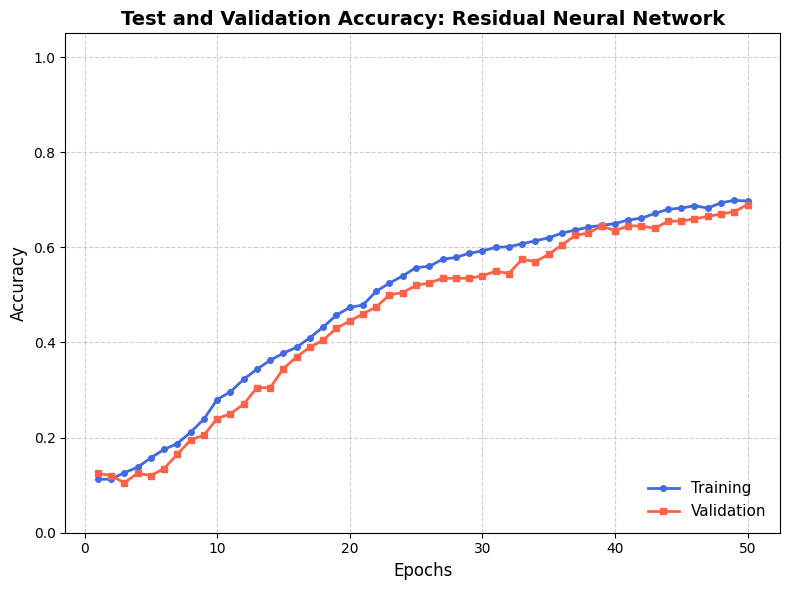

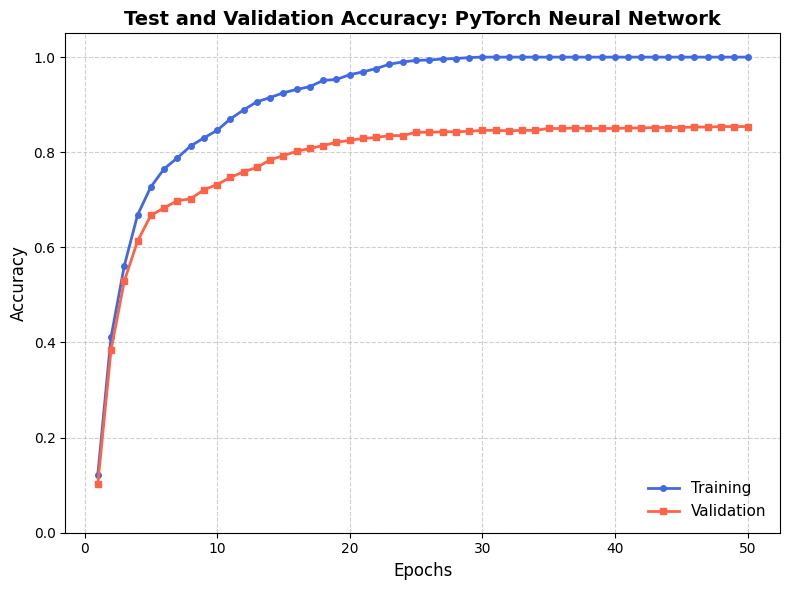

In [61]:
accuracy_plot(fnn, "Feedforward Neural Network")
accuracy_plot(res_nn, "Residual Neural Network")
accuracy_plot(torch_nn, "PyTorch Neural Network")

These graphs compare training and validation accuracy over epochs for three neural network models.

- **Feedforward NN**: Accuracy steadily improves and stabilizes, but training accuracy is consistently higher than validation, suggest mild overfitting but to an acceptable degree.
- **Residual NN**: Both training and validation accuracy improve more gradually, with smaller gaps, showing that residual connections help stablized learning.
- **PyTorch NN**: Accuracy rises more sharply and achieves higher values overall, indicating stronger performances and more efficient optimization compared to the scratch implementations.